## Clasificador por el metodo Kmeans
##### Sigilfredo Ibañez Arias  Ing Instrumentacion y control
##### 2022-2


-----------------------------------------------------------------------------------------------------------

Se importan las libreria necesarias

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from joblib import dump,load

## Base de datos

Se lee la base de datos y se verifica que no tenga valores nulos

In [60]:
data_1 = pd.read_csv('data_entrenamiento.csv')
data_1.drop(['Unnamed: 5'],axis=1,inplace=True)
data = data_1.loc[:,['variable 1','Setpoint','variable 2']]
data.isna().sum()

variable 1    0
Setpoint      0
variable 2    0
dtype: int64

Se grafica la base de datos

<AxesSubplot:>

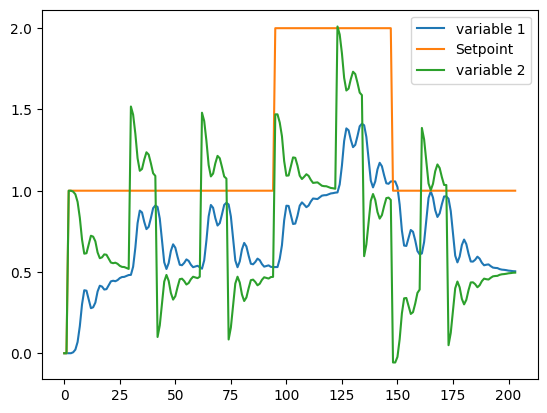

In [61]:
data.loc[:,['variable 1','Setpoint','variable 2']].plot()

## Normalizacion

Se normaliza la base de datos y se grafica

<AxesSubplot:>

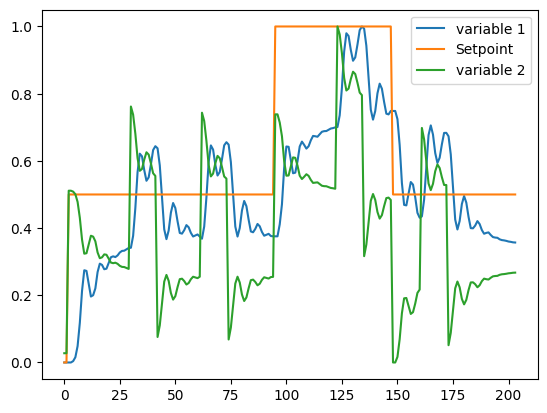

In [62]:
data = (data-data.min())/(data.max()-data.min())
data.loc[:,['variable 1','Setpoint','variable 2']].plot()

## Clasificador

Se aplica el metodo de clasificacion Kmeans con 5 clusters

Text(0.5, 0, 'Clases')

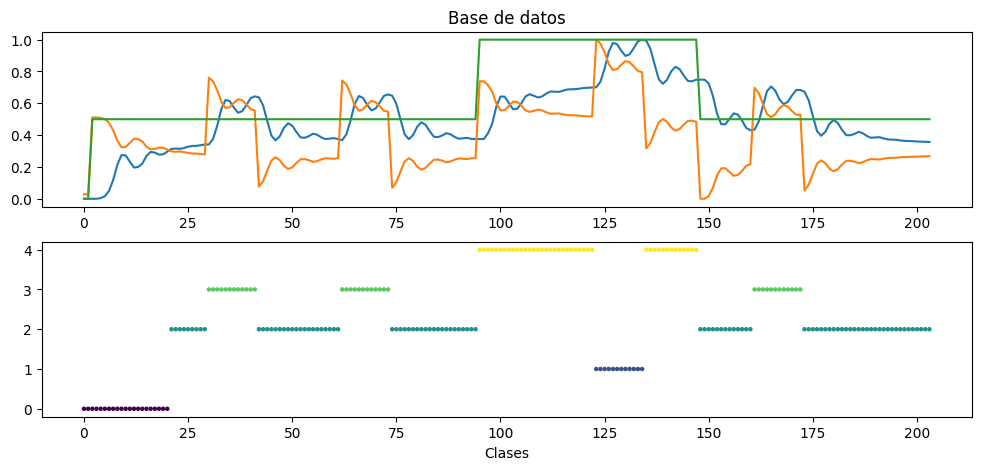

In [68]:
kmeans = KMeans(n_clusters=5).fit(data.loc[:,['variable 1','Setpoint','variable 2']])
fig, ax = plt.subplots(2,1,figsize=(12,5))
ax[0].plot(data.loc[:,'variable 1'])
ax[0].plot(data.loc[:,'variable 2'])
ax[0].plot(data.loc[:,'Setpoint'])
ax[0].set_title('Base de datos')
ax[1].scatter(range(len(kmeans.labels_)),kmeans.labels_,c=kmeans.labels_,s=5)
ax[1].set_xlabel('Clases')


<p>El algoritmo agrupo el sistema de la siguiente manera: <ul>
<li>Clase 0: en esta clase el algoritmo de clasificacion agrupo los datos que se pasan del setpoint donde el sistema tiende a estabilizar 
<li>Clase 1: en esta clase el algoritmo de clasificacion agrupo los datos 
<li>Clase 2:  
<li>Clase 3:  
</Ul> </p>

Se guarda el modelo

In [64]:
dump(kmeans,'clasificador.joblib')

['clasificador.joblib']

## Prueba

Se lee la base de datos y se normaliza

In [69]:

data_test = pd.read_csv(r"data_prueba.csv",sep=',')

data_test = data_test.loc[:,['variable 1','Setpoint','variable 2']]

data_test=(data_test-data_1.min())/(data_1.max()-data_1.min())

Se carga el modelo y se evalua

INFO: Cargando clasificador kmeans previamente entrenado


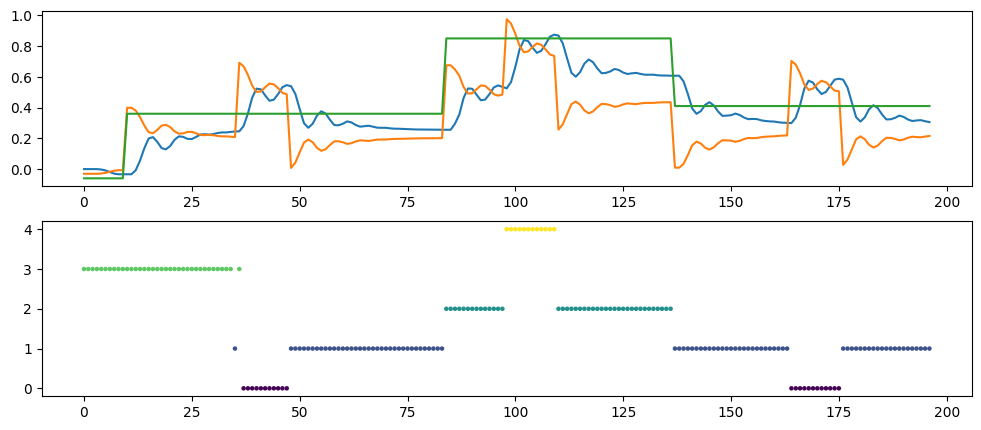

In [70]:
kmeans1=load('clasificador.joblib')
print('INFO: Cargando clasificador kmeans previamente entrenado')
kmeans2=kmeans1.predict(data_test.loc[:,['variable 1','Setpoint','variable 2']])
fig, ax = plt.subplots(2,1,figsize=(12,5))
ax[0].plot(data_test.loc[:,'variable 1'])
ax[0].plot(data_test.loc[:,'variable 2'])
ax[0].plot(data_test.loc[:,'Setpoint'])
ax[1].scatter(range(len(kmeans2)),kmeans2,c=kmeans2,s=5)